### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
# Brandon Smith 8-12-2020

#### 1. Import the necessary packages - 2.5 marks

In [2]:
#import numpy 
import numpy as np
#import pandas
import pandas as pd
#import seaborn and matplotlib (needed for seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
#need to import data from csv's
# Data.csv for user ratings
# item.csv for movie data
# user.csv for user data

rating_data = pd.read_csv('Data.csv')
movie_data = pd.read_csv('item.csv')
user_data = pd.read_csv('user.csv')


In [4]:
# rating data 100,000 rows * 4 columns
print(rating_data)

       user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]


In [5]:
# movie data 1681 rows * 22 columns
print(movie_data)

      movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childrens  Comedy  Crime  ...  Fantasy 

In [6]:
# user data 943 rows * 5 columns
print(user_data)

     user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
# rating data info
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
# rating data shape
rating_data.shape

(100000, 4)

In [9]:
# rating data describe
rating_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [10]:
# rating data na values 
rating_data.isna().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

In [11]:
# rating data missing values
rating_data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [12]:
# movie data info
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [13]:
# movie data shape
movie_data.shape

(1681, 22)

In [14]:
# movie data describe
movie_data.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# movie data na values
movie_data.isna().any()

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

In [16]:
# movie data missing values
movie_data.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [17]:
# user data info
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [18]:
# user data shape
user_data.shape

(943, 5)

In [19]:
# user data describe
user_data.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [20]:
# user data na values
user_data.isna().any()

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

In [21]:
# user data missing values
user_data.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [22]:
# Brandon Completed
# use sum on the default axis
movie_data.sum(axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [23]:
# check values and display in a more readable format
print("Number of movies per genre:")
print("Action = ", movie_data['Action'].sum(), "movies")
print("Adventure = ", movie_data['Adventure'].sum(), "movies")
print("Animation = ", movie_data['Animation'].sum(), "movies")
print("Childrens = ", movie_data['Childrens'].sum(), "movies")
print("Comedy = ", movie_data['Comedy'].sum(), "movies")
print("Crime = ", movie_data['Crime'].sum(), "movies")
print("Documentary = ", movie_data['Documentary'].sum(), "movies")
print("Drama = ", movie_data['Drama'].sum(), "movies")
print("Fantasy = ", movie_data['Fantasy'].sum(), "movies")
print("Film-Noir = ", movie_data['Film-Noir'].sum(), "movies")
print("Horror = ", movie_data['Horror'].sum(), "movies")
print("Musical = ", movie_data['Musical'].sum(), "movies")
print("Mystery = ", movie_data['Mystery'].sum(), "movies")
print("Romance = ", movie_data['Romance'].sum(), "movies")
print("Sci-Fi = ", movie_data['Sci-Fi'].sum(), "movies")
print("Thriller = ", movie_data['Thriller'].sum(), "movies")
print("War = ", movie_data['War'].sum(), "movies")
print("Western = ", movie_data['Western'].sum(), "movies")
print("unknown = ", movie_data['unknown'].sum(), "movies")

Number of movies per genre:
Action =  251 movies
Adventure =  135 movies
Animation =  42 movies
Childrens =  122 movies
Comedy =  505 movies
Crime =  109 movies
Documentary =  50 movies
Drama =  725 movies
Fantasy =  22 movies
Film-Noir =  24 movies
Horror =  92 movies
Musical =  56 movies
Mystery =  61 movies
Romance =  247 movies
Sci-Fi =  101 movies
Thriller =  251 movies
War =  71 movies
Western =  27 movies
unknown =  1 movies


#### 5. Find the movies that have more than one genre - 5 marks

In [24]:
# Brandon Completed 
#hint: use sum on the axis = 1 
genre_total = movie_data["Action"]+movie_data["Adventure"]+movie_data["Animation"]+movie_data["Childrens"]+movie_data["Comedy"]+movie_data["Crime"]+movie_data["Documentary"]+movie_data["Drama"]+movie_data["Fantasy"]+movie_data["Film-Noir"]+movie_data["Horror"]+movie_data["Musical"]+movie_data["Mystery"]+movie_data["Romance"]+movie_data["Sci-Fi"]+movie_data["Thriller"]+movie_data["War"]+movie_data["Western"]+movie_data["unknown"]
movie_data['genre_total'] = genre_total
movie_data_total = movie_data[movie_data.genre_total != 1]

movies_multiple_genres = movie_data_total[['movie title','genre_total']].copy()
pd.set_option('display.max_rows',movies_multiple_genres.shape[0]+1)
print(movies_multiple_genres)

                                            movie title  genre_total
0                                            Toy Story             3
1                                            GoldenEye             3
3                                           Get Shorty             3
4                                              Copycat             3
6                                       Twelve Monkeys             2
7                                                 Babe             3
9                                          Richard III             2
10                                       Seven (Se7en)             2
11                                 Usual Suspects, The             2
13                                         Postino, Il             2
15                         French Twist (Gazon maudit)             2
16                                 From Dusk Till Dawn             5
19                                  Angels and Insects             2
20                              Mu

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [31]:
# Brandon Complete
# Dropped Good Morning movie id = 1373 index = 1371 due to unknown genre

# could uncomment out the row below to verifiy that it is not in the displayed dataset
#pd.set_option('display.max_rows',None)

movie_data.drop(movie_data[movie_data['unknown'] == 1].index,inplace=True)
print(movie_data)

# this was first solution but didn't use the 'drop' so went with other solution
#print(movie_data[movie_data['unknown'] != 1])

      movie id                                        movie title  \
0            1                                         Toy Story    
1            2                                         GoldenEye    
2            3                                        Four Rooms    
3            4                                        Get Shorty    
4            5                                           Copycat    
5            6     Shanghai Triad (Yao a yao yao dao waipo qiao)    
6            7                                    Twelve Monkeys    
7            8                                              Babe    
8            9                                  Dead Man Walking    
9           10                                       Richard III    
10          11                                     Seven (Se7en)    
11          12                               Usual Suspects, The    
12          13                                  Mighty Aphrodite    
13          14                    

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# Brandon Complete
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

In [38]:
# Build needed dataset for visualization

# parse release year from release date
release_year = pd.DatetimeIndex(movie_data['release date']).year
# add column to movie_data for the release year
movie_data['release year'] = release_year
# create master_data with three datasets merged together
master_data = pd.merge(pd.merge(rating_data,user_data,on='user id'),movie_data,on='movie id')

print(master_data)

       user id  movie id  rating  timestamp  age gender  occupation zip code  \
0          196       242       3  881250949   49      M      writer    55105   
1          305       242       5  886307828   23      M  programmer    94086   
2            6       242       4  883268170   42      M   executive    98101   
3          234       242       4  891033261   60      M     retired    94702   
4           63       242       3  875747190   31      M   marketing    75240   
...        ...       ...     ...        ...  ...    ...         ...      ...   
99986      863      1679       3  889289491   17      M     student    60089   
99987      863      1678       1  889289570   17      M     student    60089   
99988      863      1680       2  889289570   17      M     student    60089   
99989      896      1681       3  887160722   28      M      writer    91505   
99990      916      1682       3  880845755   27      M    engineer    N2L5N   

                               movie ti

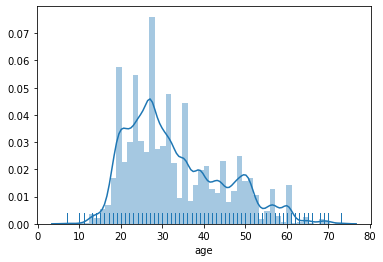

In [40]:
# age univariate distplot
sns.distplot(master_data['age'], kde=True, rug=True);

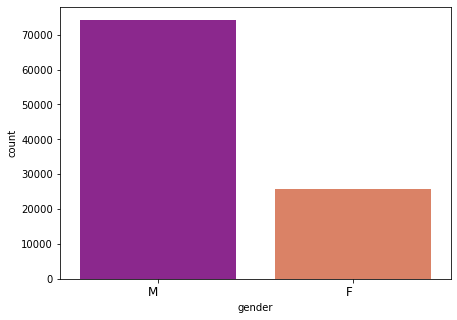

In [62]:
# gender univariate countplot
plt.figure(figsize=(7,5));
chart = sns.countplot(master_data['gender'],palette='plasma');
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=0,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
);


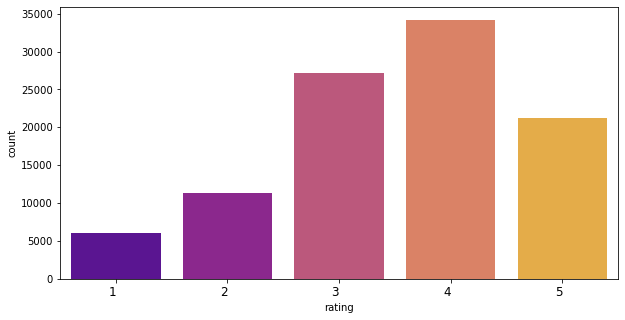

In [64]:
# ratings univariate countplot
plt.figure(figsize=(10,5));
chart = sns.countplot(master_data['rating'],palette='plasma');
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=0,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
);

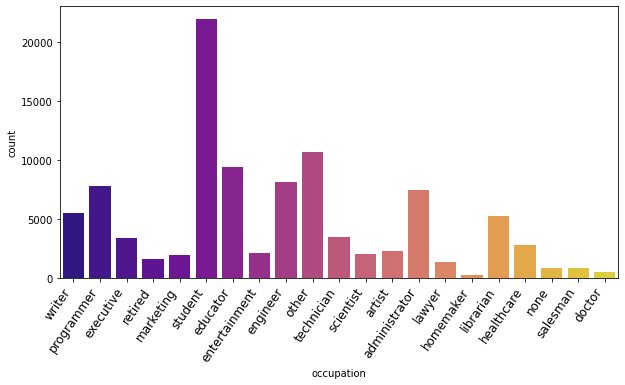

In [59]:
# occupation univariate countplot
plt.figure(figsize=(10,5));
chart = sns.countplot(master_data['occupation'],palette='plasma');
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
);



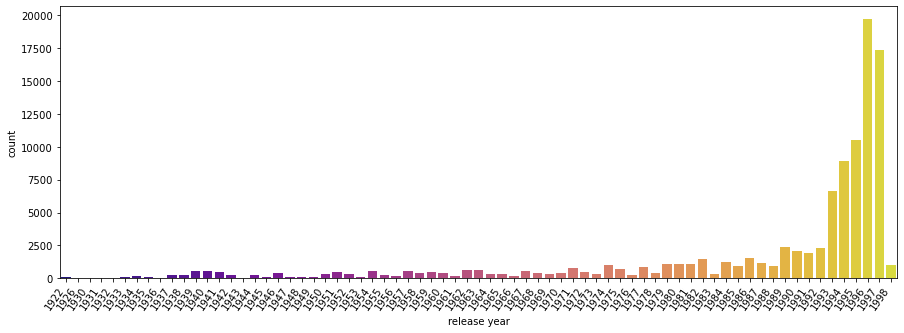

In [58]:
# release year univariate countplot
plt.figure(figsize=(15,5));
chart = sns.countplot(master_data['release year'],palette='plasma');
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

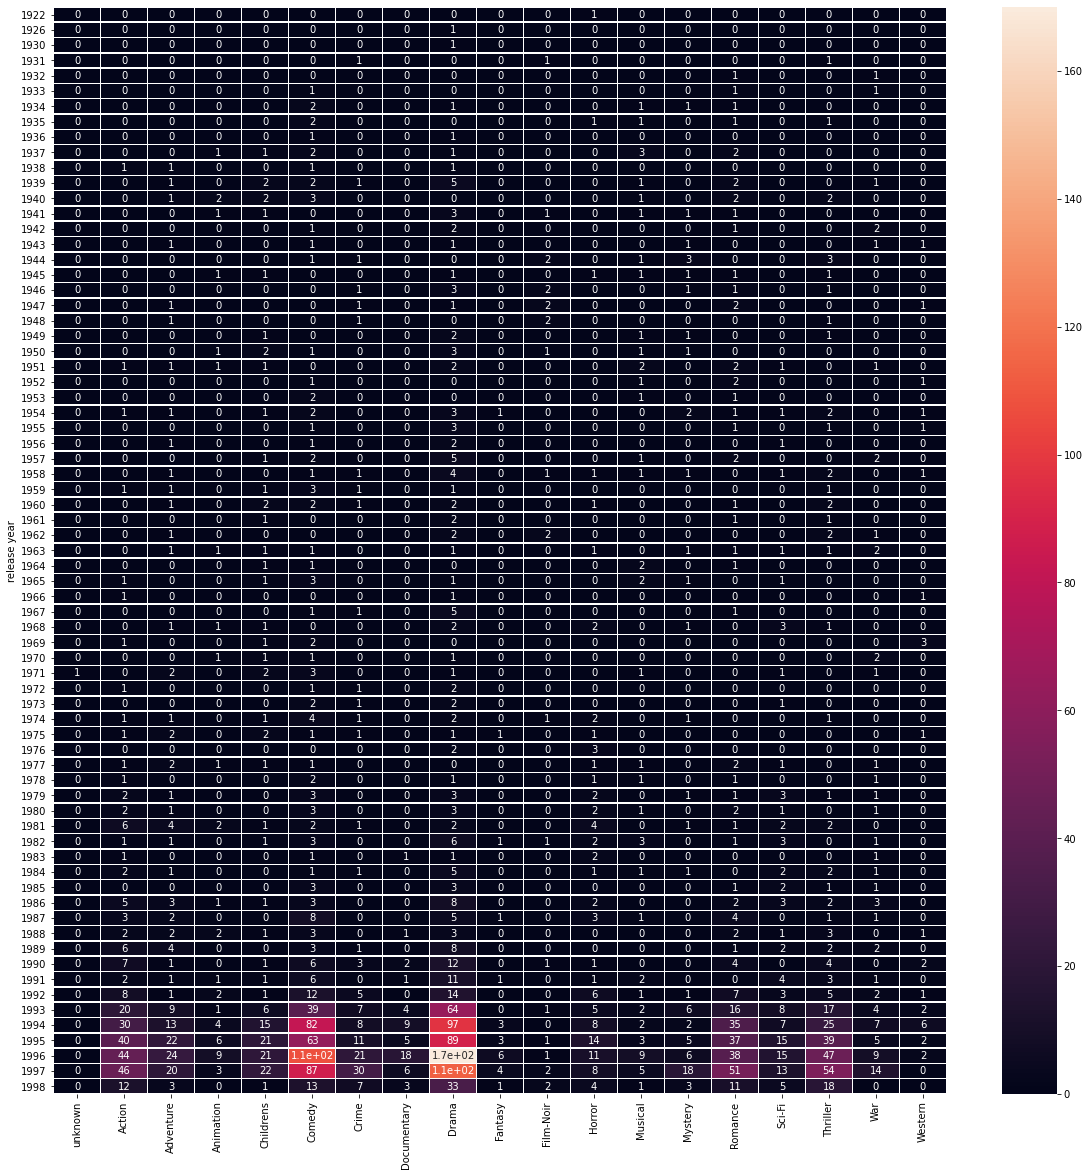

In [75]:
# Brandon Completed
# Parse release year and add column for release year
release_year = pd.DatetimeIndex(movie_data['release date']).year
movie_data['release year'] = release_year
# set index and drop unused columns
manipulated_movie_data = movie_data.set_index('release year').drop(columns=['movie id','movie title','release date','genre_total'])
# group by for results
result_df = manipulated_movie_data.groupby(by=["release year"]).sum()

# set heatframe size
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(result_df,annot=True,linewidths=.5,ax=ax);


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [117]:
# Brandon Complete
# filter the list of movie id's that have a rating count > 100 (more than 100 ratings)
top_movie_data = master_data.groupby(['movie id']).filter(lambda x: (x.rating.count() > 100))
top_movie_list = top_movie_data['movie id'].unique().tolist()
print(top_movie_list)


[242, 393, 655, 67, 238, 663, 111, 25, 286, 94, 692, 8, 428, 70, 66, 257, 202, 340, 116, 382, 285, 411, 153, 13, 762, 173, 845, 269, 302, 566, 250, 148, 470, 281, 385, 588, 322, 53, 333, 591, 742, 550, 237, 71, 554, 117, 327, 288, 225, 31, 546, 100, 118, 226, 300, 596, 95, 243, 1016, 79, 121, 568, 303, 332, 98, 56, 203, 291, 684, 38, 258, 298, 159, 12, 55, 294, 177, 331, 77, 405, 147, 241, 510, 511, 227, 433, 186, 96, 29, 403, 435, 176, 222, 455, 358, 208, 172, 230, 154, 194, 195, 168, 204, 651, 187, 515, 451, 431, 231, 367, 449, 216, 184, 211, 175, 24, 229, 109, 523, 181, 144, 2, 161, 210, 89, 228, 732, 4, 127, 926, 62, 50, 209, 526, 174, 265, 233, 68, 815, 756, 183, 310, 380, 7, 97, 509, 157, 324, 179, 54, 747, 232, 22, 122, 508, 240, 180, 191, 164, 196, 475, 217, 135, 72, 631, 69, 1047, 151, 559, 255, 42, 866, 685, 301, 739, 628, 471, 410, 92, 86, 200, 660, 215, 521, 746, 162, 246, 64, 318, 156, 268, 357, 82, 197, 527, 169, 763, 317, 235, 1, 9, 708, 214, 249, 234, 1028, 58, 276, 528

In [123]:
# find the average rating of all the movies and sort them in descending order
rating_mean = master_data.groupby(['movie id','movie title'])['rating'].mean().nlargest(1680).reset_index()
print(rating_mean_data)


      movie id                           movie title  rating
0          814               Great Day in Harlem, A      5.0
1         1122              They Made Me a Criminal      5.0
2         1189                          Prefontaine      5.0
3         1201  Marlene Dietrich: Shadow and Light (     5.0
4         1293                             Star Kid      5.0
...        ...                                   ...     ...
1675      1626  Nobody Loves Me (Keiner liebt mich)      1.0
1676      1654                Chairman of the Board      1.0
1677      1659             Getting Away With Murder      1.0
1678      1661                         New Age, The      1.0
1679      1671                   Further Gesture, A      1.0

[1680 rows x 3 columns]


In [125]:
# filter movies with more than 100 ratings
print(rating_mean[rating_mean['movie id'].isin(top_movie_list)].head(25))

    movie id                                        movie title    rating
15       408                                    Close Shave, A   4.491071
16       318                                  Schindler's List   4.466443
17       169                               Wrong Trousers, The   4.466102
18       483                                        Casablanca   4.456790
20        64                         Shawshank Redemption, The   4.445230
21       603                                       Rear Window   4.387560
22        12                               Usual Suspects, The   4.385768
23        50                                         Star Wars   4.358491
24       178                                      12 Angry Men   4.344000
28       134                                      Citizen Kane   4.292929
30       427                             To Kill a Mockingbird   4.292237
31       357                   One Flew Over the Cuckoo's Nest   4.291667
32        98                         S

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [78]:
#write the conclusions here
df = master_data.set_index('gender').drop(columns=['user id','movie id','rating','timestamp','age','occupation','zip code','movie title','release date','release year'])

result_gender_df = df.groupby('gender').sum()

print(result_gender_df)

        unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
gender                                                                    
F             0    5442       3141        995       2232    8068   1794   
M             1   20147      10612       2610       4950   21764   6261   

        Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
gender                                                                     
F               187  11008      363        385    1197     1442     1314   
M               571  28887      989       1348    4120     3512     3931   

        Romance  Sci-Fi  Thriller   War  Western  genre_total  
gender                                                         
F          5858    2629      5086  2189      371        53701  
M         13603   10101     16786  7209     1483       158885  


In [105]:
# Brandon Complete
# Statement - men watch more drama than women

# get result set
female_result = result_gender_df.loc["F"];
male_result = result_gender_df.loc["M"];
# get total for each gender
female_genre_total = female_result['genre_total']
male_genre_total = male_result['genre_total']

# print results
print('Percent of women that watch drama :', round(((female_result['Drama'])/(female_genre_total)*100),2),'%')
print('Percent of men that watch drama :', round(((male_result['Drama'])/(male_genre_total)*100),2),'%')

print('I would conclude that men do not watch more drama than women due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!')

Percent of women that watch drama : 20.5 %
Percent of men that watch drama : 18.18 %
I would conclude that men do not watch more drama than women due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!


In [108]:
# Brandon Complete
# Statement - women watch more sci-fi that men

# print results
print('Percent of women that watch Sci-Fi :', round(((female_result['Sci-Fi'])/(female_genre_total)*100),2),'%')
print('Percent of men that watch Sci-Fi :', round(((male_result['Sci-Fi'])/(male_genre_total)*100),2),'%')

print('I would conclude that women do not watch more sci-fi than men due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!')


Percent of women that watch Sci-Fi : 4.9 %
Percent of men that watch Sci-Fi : 6.36 %
I would conclude that women do not watch more sci-fi than men due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!


In [110]:
# Brandon Complete
# Statement - men watch more romance that women

# print results
print('Percent of women that watch Romance :', round(((female_result['Romance'])/(female_genre_total)*100),2),'%')
print('Percent of men that watch Romance :', round(((male_result['Romance'])/(male_genre_total)*100),2),'%')

print('I would conclude that men do not watch more romance than women due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!')


Percent of women that watch Romance : 10.91 %
Percent of men that watch Romance : 8.56 %
I would conclude that men do not watch more romance than women due to the percentages illistrated above. We can not go by actual numbers as the sample size for m vs f is not comparable!
